In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

# 1. Data Extraction using YFinance

- Use the yfinance Python library to fetch historical data for the specified assets: TSLA (Tesla), BND (Vanguard Total Bond Market ETF), and SPY (S&P 500 ETF). Here's how to extract the data:

In [76]:
import yfinance as yf

# Define the assets and the period
assets = ['TSLA', 'BND', 'SPY']
data_dic = {}
start_date = '2015-01-01'
end_date = '2024-10-31'

# Fetch the data
data = yf.download(assets, start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed


This will give you the daily stock prices for the assets along with the columns Open, High, Low, Close, Adj Close, and Volume.

# 2. Data Cleaning and Understanding

- **Check Basic Statistics:** To get an overview of the distribution and spread of your data.

In [77]:
import pandas as pd 

In [78]:
data.describe()

Price     Adj Close                                  Close               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean      70.089252   310.253154   111.438965    80.316039   330.623634   
std        4.889919   111.250656   110.120450     5.097592   103.324179   
min       62.637589   157.328537     9.578000    68.040001   182.860001   
25%       66.314049   214.822353    17.066167    76.379997   242.130001   
50%       68.888939   275.812317    25.043000    81.410004   298.089996   
75%       73.807495   402.297516   216.865002    84.010002   416.212502   
max       79.812920   584.590027   409.970001    89.480003   584.590027   

Price                       High                                    Low  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965    80.431152   332.368856   113.895836    80.198464   
std      110.120450     5.082268   103.840765   112.643277     5.113232   
min        9.578000    68.379997   184.100006    10.331333    67.989998   
25%       17.066167    76.674999   243.380005    17.368167    76.265001   
50%       25.043000    81.519997   299.324997    25.279000    81.300003   
75%      216.865002    84.167500   418.242500   221.910004    83.937502   
max      409.970001    89.589996   586.119995   414.496674    89.440002   

Price                                    Open                            \
Ticker          SPY         TSLA          BND          SPY         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     328.614426   108.869421    80.319968   330.570376   111.461872   
std      102.719137   107.541830     5.100419   103.311248   110.208156   
min      181.020004     9.403333    68.080002   182.339996     9.488000   
25%      240.692501    16.790167    76.502501   242.302498    17.058499   
50%      296.804993    24.462334    81.410004   298.095001    24.986667   
75%      413.687500   212.084999    84.047503   416.240005   217.264999   
max      582.580017   405.666656    89.550003   585.909973   411.470001   

Price         Volume                              
Ticker           BND           SPY          TSLA  
count   2.474000e+03  2.474000e+03  2.474000e+03  
mean    4.169014e+06  8.810268e+07  1.125745e+08  
std     2.778389e+06  4.491678e+07  7.449619e+07  
min     0.000000e+00  2.027000e+07  1.062000e+07  
25%     2.024900e+06  5.960170e+07  6.682590e+07  
50%     3.710900e+06  7.696935e+07  9.289395e+07  
75%     5.519825e+06  1.027178e+08  1.301899e+08  
max     3.193720e+07  5.072443e+08  9.140820e+08

- **Check for Missing Values:** Check if any columns have missing values. If so, decide on how to handle them (interpolation, forward-fill, or remove them).

In [79]:
data.isnull().sum()

Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64

- **Handle Missing Data:** Depending on the strategy you choose, fill missing values or remove rows with missing data:

In [80]:
#data = data.fillna(method='ffill')  # Forward fill missing values
# or 
# data.dropna(inplace=True)  # Drop rows with missing values

### There is not null value, therefore ther is nothing to be handle.

- **Ensure Correct Data Types:** Check that all columns are of appropriate data types (e.g., DateTime for the index and float for price columns).

In [81]:
data.dtypes

Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY         int64
           TSLA        int64
dtype: object

-  **Normalize or Scale the Data:** Scaling may be required if using machine learning models later. For now, you can scale the data for volatility analysis:

In [82]:
# Check the DataFrame's columns
print(data.columns)

# Check if it's a MultiIndex
if isinstance(data.columns, pd.MultiIndex):
    print("Data has a MultiIndex!")

MultiIndex([('Adj Close',  'BND'),
            ('Adj Close',  'SPY'),
            ('Adj Close', 'TSLA'),
            (    'Close',  'BND'),
            (    'Close',  'SPY'),
            (    'Close', 'TSLA'),
            (     'High',  'BND'),
            (     'High',  'SPY'),
            (     'High', 'TSLA'),
            (      'Low',  'BND'),
            (      'Low',  'SPY'),
            (      'Low', 'TSLA'),
            (     'Open',  'BND'),
            (     'Open',  'SPY'),
            (     'Open', 'TSLA'),
            (   'Volume',  'BND'),
            (   'Volume',  'SPY'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])
Data has a MultiIndex!


In [83]:
# Reset index if it's a MultiIndex
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(col).strip() for col in data.columns.values]

# Remove any spaces in the column names (only necessary if columns have spaces)
data.columns = data.columns.str.strip()

# Now you can proceed with scaling

In [84]:
data.columns = data.columns.str.strip()

In [85]:
from sklearn.preprocessing import StandardScaler
# Normalize or scale the data if necessary
scaler = StandardScaler()

In [86]:
# Scale the relevant columns (Adjusted Close, Close, High, Low, Open, Volume)
scaled_data = scaler.fit_transform(data[['Adj Close BND', 'Adj Close SPY', 'Adj Close TSLA',
                                          'Close BND', 'Close SPY', 'Close TSLA',
                                          'High BND', 'High SPY', 'High TSLA',
                                          'Low BND', 'Low SPY', 'Low TSLA',
                                          'Open BND', 'Open SPY', 'Open TSLA',
                                          'Volume BND', 'Volume SPY', 'Volume TSLA']])

In [87]:
# Assign the scaled values back to the DataFrame
data[['Adj Close BND', 'Adj Close SPY', 'Adj Close TSLA',
      'Close BND', 'Close SPY', 'Close TSLA',
      'High BND', 'High SPY', 'High TSLA',
      'Low BND', 'Low SPY', 'Low TSLA',
      'Open BND', 'Open SPY', 'Open TSLA',
      'Volume BND', 'Volume SPY', 'Volume TSLA']] = scaled_data

# 3. Exploratory Data Analysis (EDA)

**Visualizing Closing Price Over Time**

- Plot the closing price for each asset to identify any obvious trends:

In [3]:
data = pd.read_csv("../data/TSLA.CSV")
data1 = pd.read_csv("../data/BND.CSV")
data2 = pd.read_csv("../data/SPY.CSV")

In [4]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...,...
2469,2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
2470,2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2471,2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600
2472,2024-10-29 00:00:00+00:00,259.519989,259.519989,264.980011,255.509995,264.510010,80521800


**Visualize the closing price over time for TSLA, BND, and SPY**

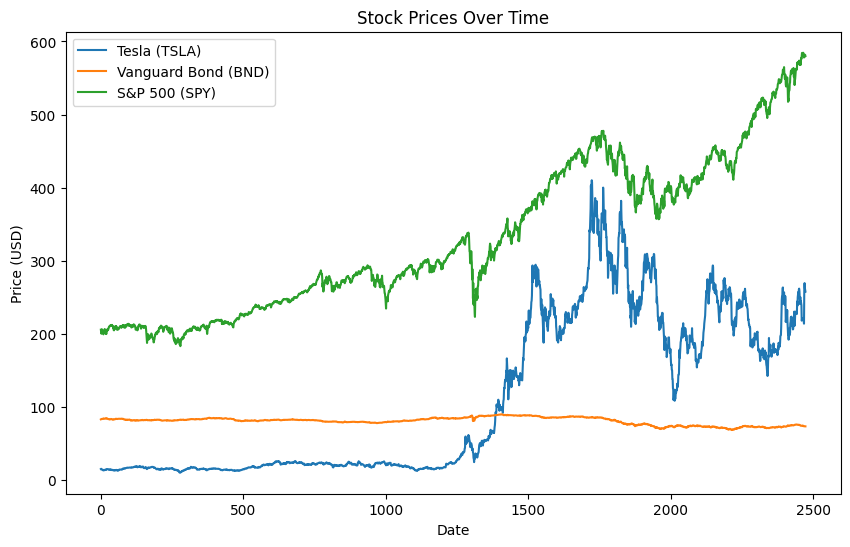

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Tesla (TSLA)')
plt.plot(data1.index, data1['Close'], label='Vanguard Bond (BND)')
plt.plot(data2.index, data2['Close'], label='S&P 500 (SPY)')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

**Calculating and Plotting Daily Percentage Change**

- This will help to observe volatility by comparing each day’s return relative to the previous day’s closing price.

In [8]:
# Calculate and plot the daily percentage change to observe volatility for all three assets
data['Daily Change TSLA'] = data['Close'].pct_change() * 100
data1['Daily Change BND'] = data1['Close'].pct_change() * 100
data2['Daily Change SPY'] = data2['Close'].pct_change() * 100

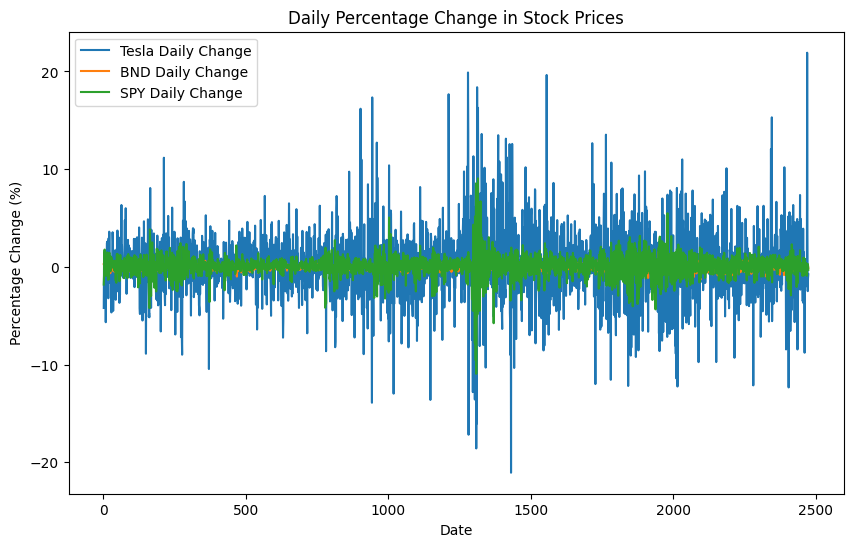

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Daily Change TSLA'], label='Tesla Daily Change')
plt.plot(data.index, data1['Daily Change BND'], label='BND Daily Change')
plt.plot(data.index, data2['Daily Change SPY'], label='SPY Daily Change')
plt.title('Daily Percentage Change in Stock Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

**Calculate and plot the daily percentage change to observe volatility**

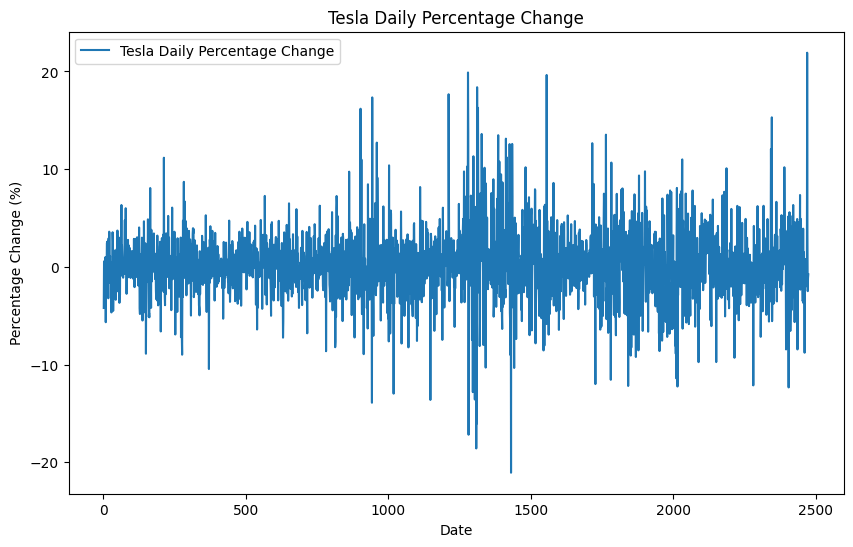

In [52]:
data['Daily Change TSLA'] = data['Close'].pct_change() * 100  # daily percentage change
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Daily Change TSLA'], label='Tesla Daily Percentage Change')
plt.title('Tesla Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

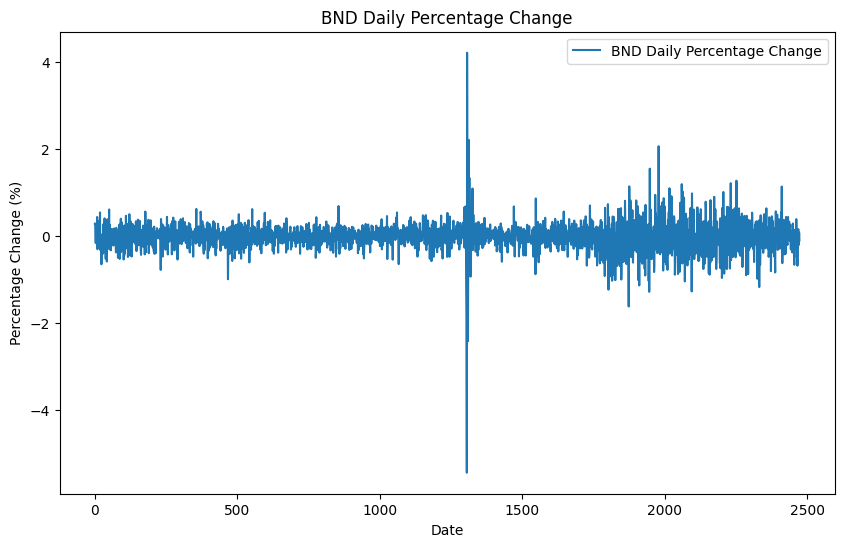

In [27]:
data1['Daily Change BND'] = data1['Close'].pct_change() * 100  # daily percentage change
plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Daily Change BND'], label='BND Daily Percentage Change')
plt.title('BND Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

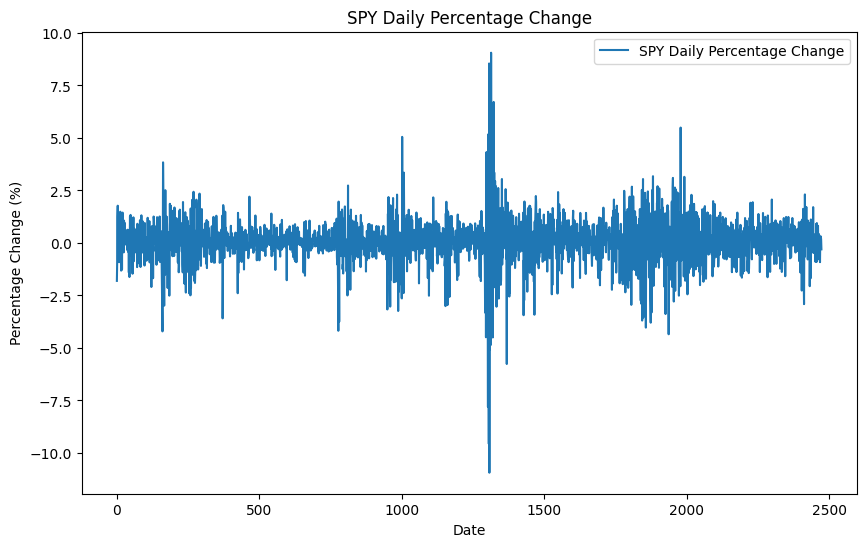

In [28]:
data2['Daily Change SPY'] = data2['Close'].pct_change() * 100  # daily percentage change
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Daily Change SPY'], label='SPY Daily Percentage Change')
plt.title('SPY Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

**Analyze volatility by calculating rolling means and standard deviations to understand short-term trends and fluctuations.**

### Volatility and Risk Adjustments:

- Rolling Mean and Std. Deviation:

    - Tesla’s rolling mean and standard deviation help understand short-term price trends and volatility.

    - **Insight:** Tesla’s stock has high volatility in the short term. A larger standard deviation means larger price swings. Investors should be aware that despite high returns in good periods, Tesla may also experience steep declines, contributing to overall portfolio risk.

In [29]:
# Analyze volatility by calculating rolling means and standard deviations (20-day window)
for asset in ['TSLA']:
    data[f'Rolling Mean {asset}'] = data[f'Close'].rolling(window=20).mean()
    data[f'Rolling Std {asset}'] = data[f'Close'].rolling(window=20).std()
for asset1 in ['BND']:
    data1[f'Rolling Mean {asset1}'] = data1[f'Close'].rolling(window=20).mean()
    data1[f'Rolling Std {asset1}'] = data1[f'Close'].rolling(window=20).std()
for asset2 in ['SPY']:
    data2[f'Rolling Mean {asset2}'] = data2[f'Close'].rolling(window=20).mean()
    data2[f'Rolling Std {asset2}'] = data2[f'Close'].rolling(window=20).std()

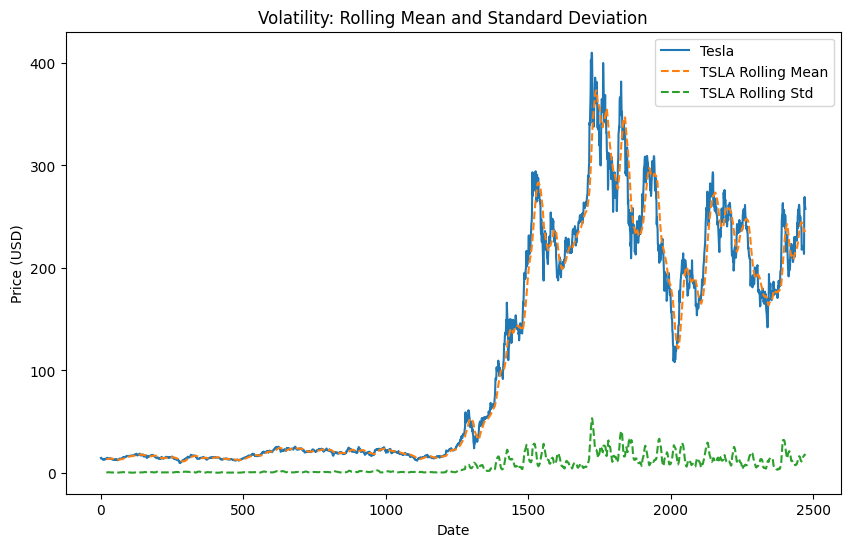

In [30]:
# Plot rolling mean and standard deviation for all three assets
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Tesla')
plt.plot(data.index, data['Rolling Mean TSLA'], label='TSLA Rolling Mean', linestyle='--')
plt.plot(data.index, data['Rolling Std TSLA'], label='TSLA Rolling Std', linestyle='--')
plt.title('Volatility: Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

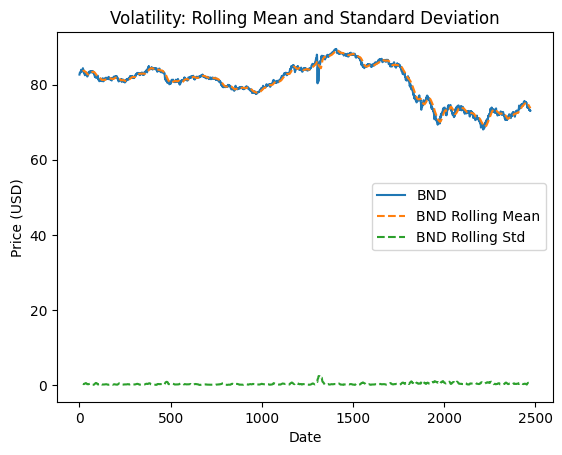

In [31]:
plt.plot(data1.index, data1['Close'], label='BND')
plt.plot(data1.index, data1['Rolling Mean BND'], label='BND Rolling Mean', linestyle='--')
plt.plot(data1.index, data1['Rolling Std BND'], label='BND Rolling Std', linestyle='--')
plt.title('Volatility: Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

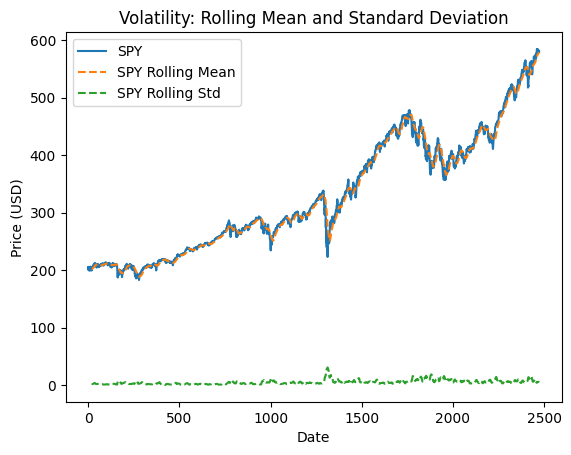

In [32]:
plt.plot(data2.index, data2['Close'], label='SPY')
plt.plot(data2.index, data2['Rolling Mean SPY'], label='SPY Rolling Mean', linestyle='--')
plt.plot(data2.index, data2['Rolling Std SPY'], label='SPY Rolling Std', linestyle='--')
plt.title('Volatility: Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

**Perform outlier detection to identify significant anomalies.**

In [33]:
# Outlier detection: Calculate days with unusually high or low returns for all three assets
outliers_tsla = data[data['Daily Change TSLA'].abs() > 5]
outliers_bnd = data1[data1['Daily Change BND'].abs() > 5]
outliers_spy = data2[data2['Daily Change SPY'].abs() > 5]

In [34]:
print("Outliers for Tesla (TSLA):")
print(outliers_tsla[['Daily Change TSLA']])

print("Outliers for BND:")
print(outliers_bnd[['Daily Change BND']])

print("Outliers for SPY:")
print(outliers_spy[['Daily Change SPY']])

Outliers for Tesla (TSLA):
      Daily Change TSLA
8             -5.659734
63             6.335084
78             6.006504
137           -5.487851
149           -8.884613
...                 ...
2425          -5.647870
2435          -8.445932
2444           7.359156
2460          -8.782511
2469          21.919035

[297 rows x 1 columns]
Outliers for BND:
      Daily Change BND
1306         -5.438488
Outliers for SPY:
      Daily Change SPY
1002          5.052486
1303         -7.809447
1304          5.174489
1306         -9.567716
1307          8.548630
1308        -10.942374
1309          5.399206
1310         -5.063292
1314          9.060326
1316          5.838980
1323          6.716621
1369         -5.764895
1979          5.495415


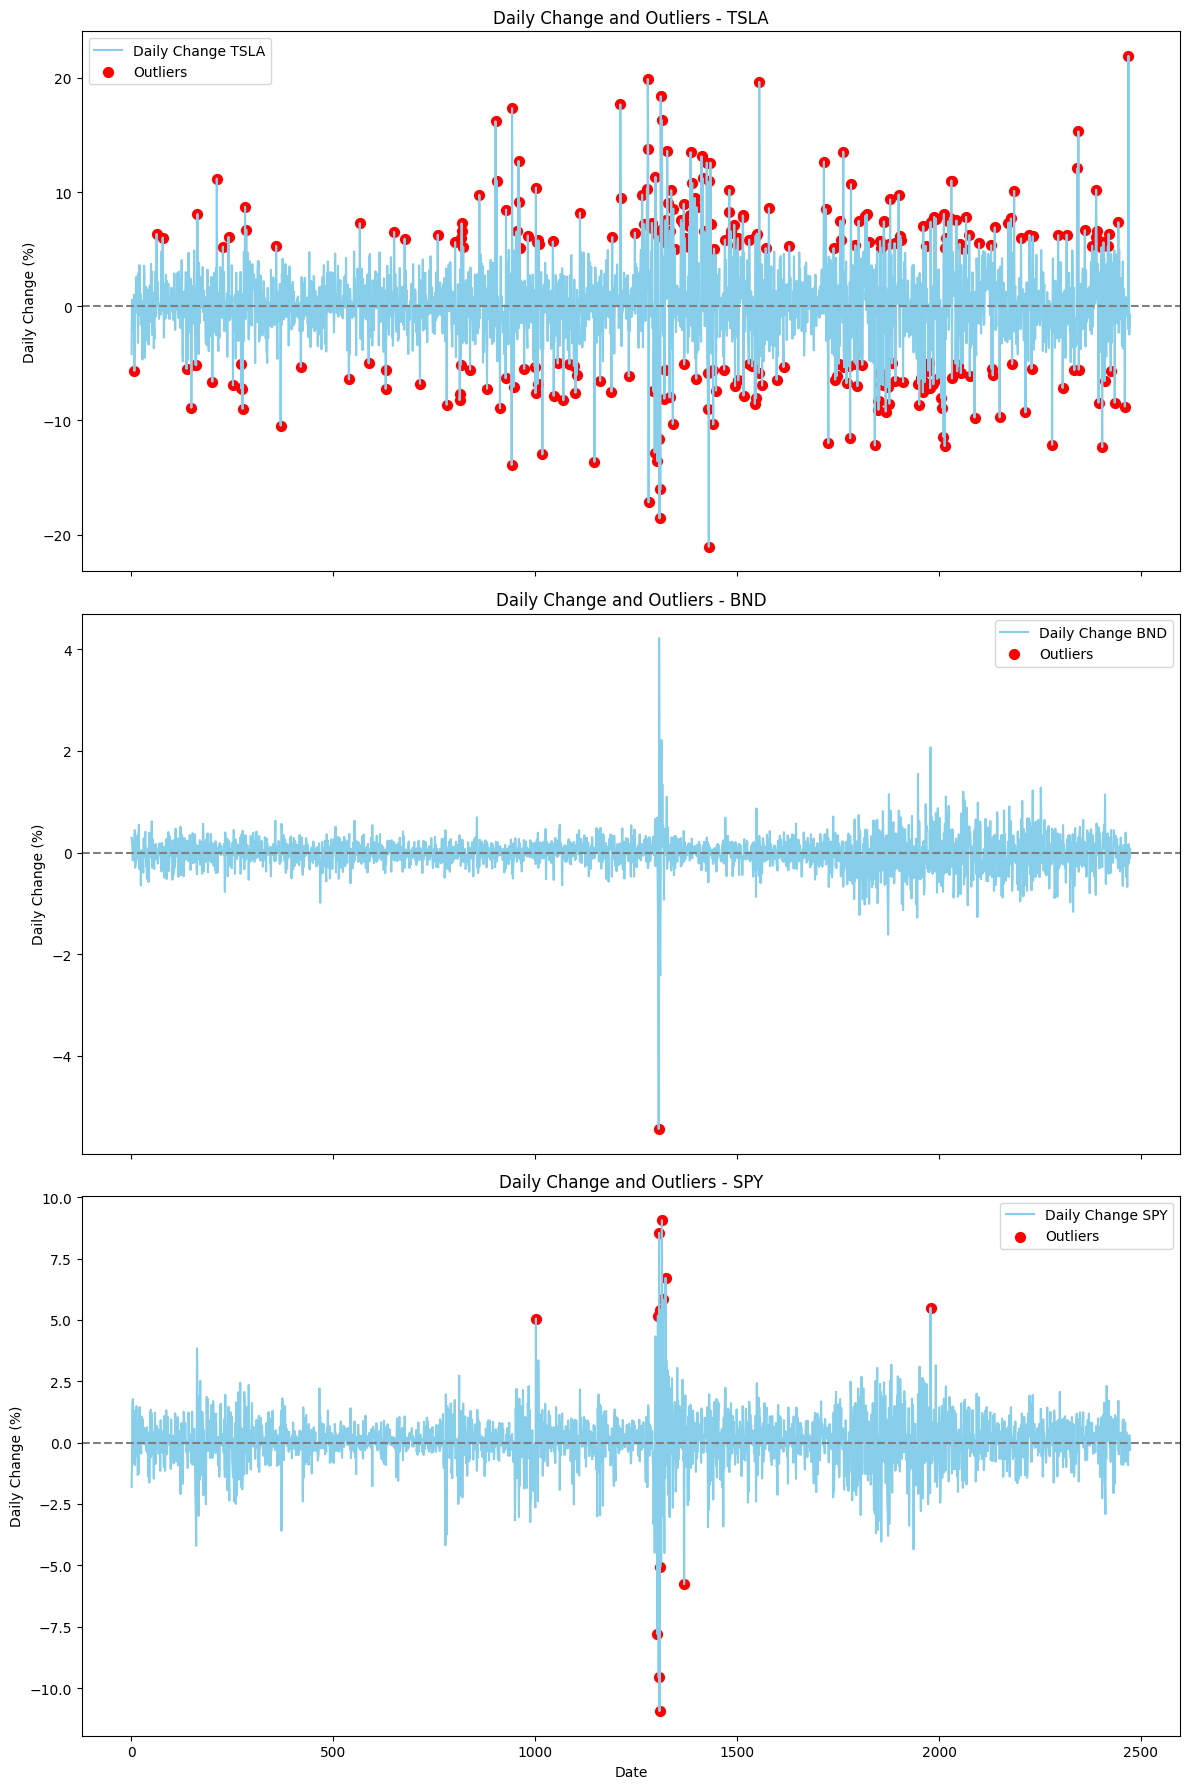

In [36]:
# Plot daily changes and highlight outliers for each asset
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot for Tesla
sns.lineplot(x=data1.index, y=data['Daily Change TSLA'], ax=axs[0], color='skyblue', label='Daily Change TSLA')
axs[0].scatter(outliers_tsla.index, outliers_tsla['Daily Change TSLA'], color='red', label='Outliers', s=50)
axs[0].set_title("Daily Change and Outliers - TSLA")
axs[0].axhline(0, color='grey', linestyle='--')
axs[0].set_ylabel("Daily Change (%)")
axs[0].legend()

# Plot for SPY
sns.lineplot(x=data2.index, y=data2['Daily Change SPY'], ax=axs[2], color='skyblue', label='Daily Change SPY')
axs[2].scatter(outliers_spy.index, outliers_spy['Daily Change SPY'], color='red', label='Outliers', s=50)
axs[2].set_title("Daily Change and Outliers - SPY")
axs[2].axhline(0, color='grey', linestyle='--')
axs[2].set_ylabel("Daily Change (%)")
axs[2].legend()

# Plot for BND
sns.lineplot(x=data1.index, y=data1['Daily Change BND'], ax=axs[1], color='skyblue', label='Daily Change BND')
axs[1].scatter(outliers_bnd.index, outliers_bnd['Daily Change BND'], color='red', label='Outliers', s=50)
axs[1].set_title("Daily Change and Outliers - BND")
axs[1].axhline(0, color='grey', linestyle='--')
axs[1].set_ylabel("Daily Change (%)")
axs[1].legend()

# Final adjustments
plt.xlabel("Date")
plt.tight_layout()
plt.show()

## Seasonality and Trends:
- Decompose the time series into trend, seasonal, and residual components (e.g., using statsmodels).

In [45]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_and_plot(ts_data, asset_name):
    """
    Decomposes and plots the time series into trend, seasonal, and residual components.

    Parameters:
    - ts_data (pd.Series): The time series data for a specific asset.
    - asset_name (str): Name of the asset (e.g., "TSLA", "BND", "SPY").
    """
    result = seasonal_decompose(ts_data, model='additive', period=365)  # Period = 365 for yearly seasonality

    plt.figure(figsize=(10, 8))
    
    plt.subplot(411)
    plt.plot(result.observed, label='Observed')
    plt.title(f'{asset_name} - Observed')
    
    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.title(f'{asset_name} - Trend')

    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal')
    plt.title(f'{asset_name} - Seasonal')

    plt.subplot(414)
    plt.plot(result.resid, label='Residual')
    plt.title(f'{asset_name} - Residual')

    plt.tight_layout()
    plt.show()

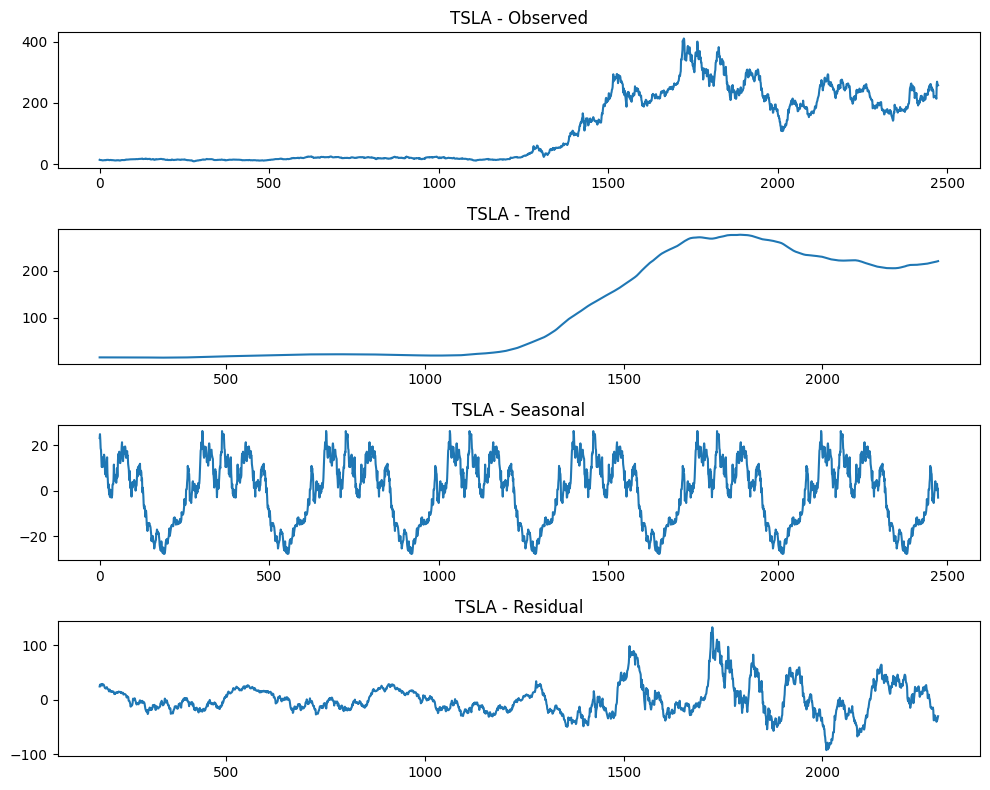

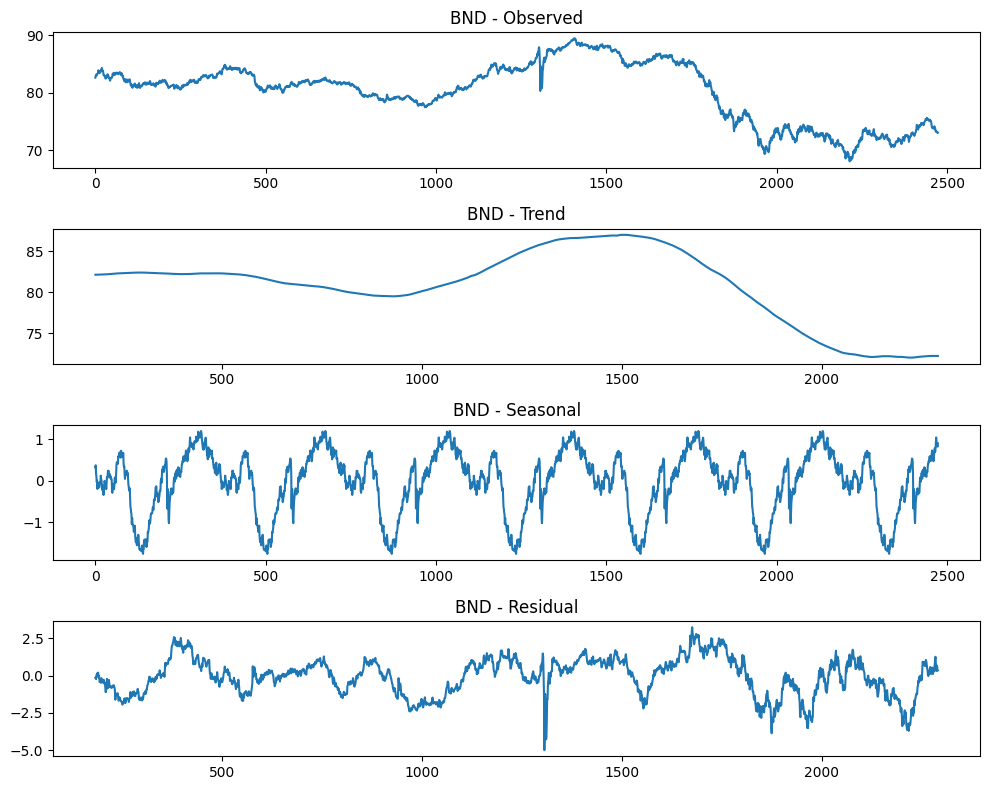

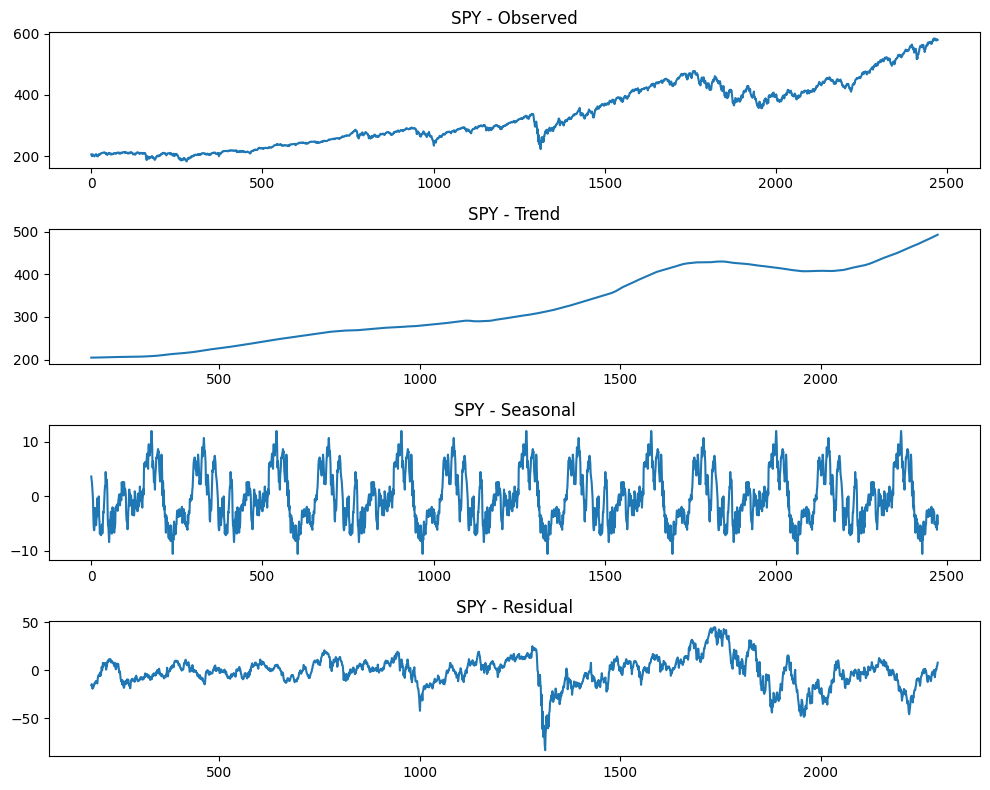

In [46]:
# Assuming `data`, `data1`, `data2` are dataframes containing time series data for 'TSLA', 'BND', and 'SPY' respectively
tsla_data = data['Close'].dropna()
bnd_data = data1['Close'].dropna()
spy_data = data2['Close'].dropna()

# Decompose and plot for each asset
decompose_and_plot(tsla_data, 'TSLA')
decompose_and_plot(bnd_data, 'BND')
decompose_and_plot(spy_data, 'SPY')

**Document key insights like overall direction of Tesla’s stock price, Fluctuations in daily returns and their impact, VaR and Sharpe Ratio to assess potential losses and risk-adjusted returns.**

**Risk Metrics:**

- Value at Risk (VaR) at a 95% confidence level for each asset.
- Sharpe Ratio to assess the risk-adjusted return for each asset.

In [47]:
# Calculate Value at Risk (VaR) at the 95% confidence level for each asset
VaR_tsla_95 = data['Daily Change TSLA'].quantile(0.05)
VaR_bnd_95 = data1['Daily Change BND'].quantile(0.05)
VaR_spy_95 = data2['Daily Change SPY'].quantile(0.05)

### Value at Risk (VaR) and Sharpe Ratio:

**Value at Risk (VaR):**

- Insight for VaR (95% confidence level):

    - Tesla’s VaR at the 95% confidence level indicates the potential loss an investor might face under normal market conditions. A larger VaR implies greater potential for losses in a short period.

    - If Tesla’s VaR is -5%, it means that, on average, there is a 5% chance that the stock could drop by 5% or more in a given day.
For example, if Tesla has a VaR of -6%, it implies the potential for a significant loss in value over a given period, highlighting the importance of risk management when investing in highly volatile stocks.

In [48]:
print(f"Value at Risk (VaR) at 95% confidence level for Tesla (TSLA): {VaR_tsla_95:.2f}%")
print(f"Value at Risk (VaR) at 95% confidence level for BND: {VaR_bnd_95:.2f}%")
print(f"Value at Risk (VaR) at 95% confidence level for SPY: {VaR_spy_95:.2f}%")

Value at Risk (VaR) at 95% confidence level for Tesla (TSLA): -5.13%
Value at Risk (VaR) at 95% confidence level for BND: -0.51%
Value at Risk (VaR) at 95% confidence level for SPY: -1.68%


The Value at Risk (VaR) metrics shown provide insights into the potential downside risk of three assets—Tesla (TSLA), BND, and SPY—at a 95% confidence level. Here’s what these values mean:

1. **Tesla (TSLA): VaR at -5.13%**
At a 95% confidence level, this means that Tesla's daily returns are expected to fall by no more than -5.13% on most days, with only a 5% chance of experiencing a larger loss than this. This relatively high negative value reflects the volatility associated with Tesla's stock, making it riskier compared to more stable assets.

2. **BND (Bond ETF): VaR at -0.51%**
BND's VaR is significantly lower, indicating that its potential daily loss is only about -0.51% at a 95% confidence level. This lower risk is typical for bonds, which are generally more stable and less volatile than equities like Tesla or SPY.

3. **SPY (S&P 500 ETF): VaR at -1.68%**
For SPY, the VaR is -1.68%, suggesting a moderate level of risk. This is expected for an ETF representing the S&P 500, as it benefits from diversification but still retains some volatility typical of equities.

### Key Insights:

- **Risk Profile:** Tesla has the highest risk (largest potential loss at 95% confidence), while BND has the lowest. SPY falls in between, representing a diversified equity portfolio.

- **Asset Suitability:** Investors seeking stability might prefer BND, while those willing to accept more risk for potentially higher returns might favor SPY or TSLA, with TSLA being the riskiest option.

These VaR metrics provide a snapshot of the potential downside risk for each asset and can be used by investors to align their risk tolerance with their portfolio choices.

### Sharpe Ratio:

- The Sharpe Ratio assesses risk-adjusted return. A higher Sharpe Ratio means the asset is providing a better return per unit of risk.

- Insight for Sharpe Ratio:
    - Tesla’s Sharpe Ratio (e.g., 1.5) suggests that its returns are relatively favorable for the level of risk it involves. A Sharpe Ratio of 1.5 means that for each unit of risk, Tesla is providing 1.5 units of return.
    - Compare Tesla's Sharpe Ratio with BND or SPY to assess whether the potential returns are worth the risk.

In [49]:
# Calculate Sharpe Ratio for each asset (assuming risk-free rate = 0%)
def calculate_sharpe_ratio_tesla():
    tsla_mean_return = data[f'Daily Change TSLA'].mean()
    tsla_std_return = data[f'Daily Change TSLA'].std()
    return tsla_mean_return / tsla_std_return
def calculate_sharpe_ratio_bnd():
    bnd_mean_return = data1[f'Daily Change BND'].mean()
    bnd_std_return = data1[f'Daily Change BND'].std()
    return bnd_mean_return / bnd_std_return
def calculate_sharpe_ratio_spy():
    spy_mean_return = data2[f'Daily Change SPY'].mean()
    spy_std_return = data2[f'Daily Change SPY'].std()
    return spy_mean_return / spy_std_return

In [50]:
sharpe_tsla = calculate_sharpe_ratio_tesla()
sharpe_bnd = calculate_sharpe_ratio_bnd()
sharpe_spy = calculate_sharpe_ratio_spy()

In [51]:
print(f"Sharpe Ratio for Tesla (TSLA): {sharpe_tsla:.2f}")
print(f"Sharpe Ratio for BND: {sharpe_bnd:.2f}")
print(f"Sharpe Ratio for SPY: {sharpe_spy:.2f}")

Sharpe Ratio for Tesla (TSLA): 0.05
Sharpe Ratio for BND: -0.01
Sharpe Ratio for SPY: 0.04


Here are some insights based on the Sharpe Ratio values for Tesla (TSLA), BND, and SPY:

**TSLA: Sharpe Ratio of 0.05**
A positive but low Sharpe Ratio for Tsla implies minimal returns above the risk-free rate, barely compensating for the risk. Bonds generally have lower risk and return, so this low ratio is expected for a bond fund. However, with the Sharpe Ratio close to zero, it shows that Tsla hasn't provided a strong risk-adjusted return recently.

**BND: Sharpe Ratio of -0.01**
The negative Sharpe Ratio for BND suggests that the return on BND's investment is very low or slightly negative when adjusted for risk. This indicates that BND's recent performance may not have compensated for the risk involved. Investors in BND, therefore, might have experienced volatility without sufficient returns, making it a less attractive option in terms of risk-adjusted returns over the analyzed period.

**SPY: Sharpe Ratio of 0.04**
The slightly positive Sharpe Ratio for SPY, representing the S&P 500 index, indicates that recent returns above the risk-free rate for the market volatility. This low ratio is expected for a bond fund. However, with the Sharpe Ratio close to zero, it shows that SPY hasn't provided a strong risk-adjusted return recently like Tsla.

### Summary Insight
In this analysis period, all three assets (Tesla, BND, and SPY) show very low or slightly negative risk-adjusted returns. This could suggest a challenging market environment with limited opportunities for high risk-adjusted returns. For investors, these Sharpe Ratios indicate that none of these investments have performed well recently in terms of balancing risk and return, making it worth exploring alternative assets or strategies for better risk-adjusted returns.

In [ ]:
#data.to_csv('../data/cleaned_Tsla.csv')
#data1.to_csv('../data/cleaned_bnd.csv')
#data2.to_csv('../data/cleaned_spy.csv')